<a href="https://colab.research.google.com/github/LeonardoCamargoRossato/MetCompB/blob/main/Resolucao_Prova2/Resolucao_Prova2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# MetCompB (2023/1) -- UFRGS
---

## Resolução Prova 2

<img src="https://github.com/LeonardoCamargoRossato/MetCompB/blob/main/Resolucao_Prova2/Questao1_Prova2_MetcompB.png?raw=1" alt="Questao2_Prova2_MetCompB" width="500">

#### (a) Determinar a Distribuição Transformada

A transformação dada é y(x) = 1/x - 1. Para determinar a distribuição dos números aleatórios após essa transformação, podemos usar a teoria da função de densidade de probabilidade transformada.

A função de densidade de probabilidade p(y) é dada por:

$$ p(y) = p(x) \left| \frac{dx}{dy} \right|  $$

Onde p(x) é a densidade de probabilidade original ( uniforme em [0, 1)  ) e dx/dy é a derivada inversa da transformação.

Na transformação $ y(x) = \frac{1}{x} - 1 $, a derivada inversa é $ \frac{dx}{dy} = \frac{-1}{ (y + 1)^{2}} $.

Portanto, a densidade de probabilidade transformada p(y) é:

$$ p(y) = \frac{1}{(y + 1)^2} $$

Agora, para determinar o domínio dos y, devemos observar o domínio dos x, que é [0, 1). Portanto, para os y, o domínio será [0, ∞).

De forma esquematica, temos:

* Quando $ x = 0 \;\; \rightarrow \;\; y = \infty $
* Quando $ x = 1 \;\; \rightarrow \;\; y = 0 $
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
* Portanto --> Domínio de  y --> $ D_y := y \;\; \in \;\; [0, \infty)$

---
---
##### Acaba aqui resposta Q1. Letra a)   .    
---
---
---
---

*Algumas observações interesantes de se notar:*
 A área abaixo da curva da Densidade de Probabilidade transformada p(y) deve sempre ser 1 (já que é uma função de probabilidade):

$$ \int_{0}^{\infty} \frac{1}{(y + 1)^2} \,dy = 1 \;\;$$

---
*Uma passagem mais algébrica para '(tentar) ajudar' a entender esse Método da Transformada*:

* Se a FDA dada é $ y(x) = 1/x - 1$, então a função inversa $ F^{-1}_{x} = x(y) =  1 / (y + 1) $.
* Aplicando uma amostra de números provenientes da Distribuição Uniforme, ou seja, valores entre [0,1)  na função inversa, obtemos a Distribuição da função inicial FDA.

$$ Se \;\;\; X  = F^{-1}_{x}(U) \;\;, \;\;\ sendo \;\; U := amostra \; da \; Distribuição \; uniforme $$

\begin{eqnarray}  
  P[X \leq x ] &=& P[ F^{-1}_{x}(U) \leq x] \\
               &=& P[ F_{x}(F^{-1}_{x}(U)) \leq F_{x}(x)] \\
               &=& P[ U \leq F_{x}(x) ] \\
               &=& F_{x}(x) \\
               &=& y(x)
\end{eqnarray}

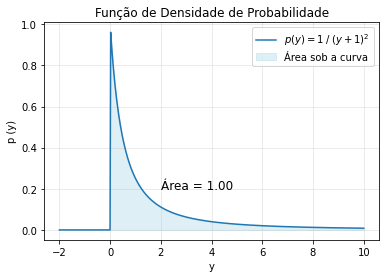

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def p_y(y):
    if   y < -1: return 0
    elif y > 0 : return 1 / (y + 1) ** 2
    else:        return 0

y_valores = np.linspace(-2, 10, 500)
p_valores = [p_y(y) for y in y_valores]
integral_resultado, _ = quad(p_y, -np.inf, np.inf)

plt.plot(y_valores, p_valores, label='$p(y) = 1 \; / \; (y + 1)^2$')
plt.fill_between(y_valores, p_valores, color='lightblue', alpha=0.4, label='Área sob a curva')
plt.annotate(f'Área = {integral_resultado:.2f}', xy=(2, 0.2), fontsize=12, color='black')
plt.xlabel('y'); plt.ylabel('p (y)'); plt.title('Função de Densidade de Probabilidade')
plt.legend(); plt.grid(alpha=0.3); plt.show()

---
---
---
### Q1. (b) Gerar Números e Fazer Histogramas

Vamos usar a distribuição teórica p(y) para gerar números aleatórios e, em seguida, fazer histogramas para diferentes tamanhos de conjuntos.

### Q1. (c) Histogramas em Escala Log-Log

Para fazer os histogramas em escala log-log, podemos ajustar o eixo x e y para a escala logarítmica:

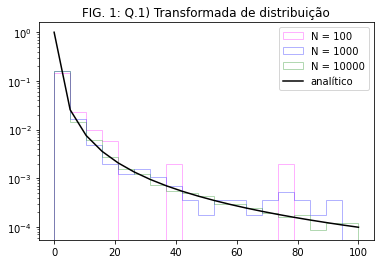

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import*

# Definição das funções ydx(x) e pdy(y)
def ydx(x):
    return 1/x - 1

def pdy(y):
    return 1 / ((y+1)**2)  # --> p(y) = p(x)|dx/dy|

# Valores de N (número de pontos) para cada conjunto / amostra
conj = np.logspace(2, 4, num=3)   # amostras: (100, 1000, 10000)

# Intervalos dos bins para o histograma
bins = np.linspace(0, 100, num=20)

# Cores para as linhas
linhas = ['magenta', 'blue', 'green']

# Lista para armazenar os valores de y
lista_y = []

# Loop para cada conjunto  --> Pra gerar um histograma diferente p/ cada amostra (100, 1000, 10000)
for i in range(len(conj)):
    N = int(conj[i])
    cor = linhas[i]

    # Gerando os valores de y e adicionando à lista
    for j in range(N):
        x = random()  # Gera nº "aleatório"
        y = ydx(x)
        lista_y.append(y)

    # Plotagem do histograma com barras visíveis e opacidade
    plt.hist(lista_y, bins=bins, density=True, histtype='step', ec=cor, label='N = '+ str(int(conj[i])), alpha=0.3)

# Plotagem da curva analítica em preto
plt.plot(bins, pdy(bins), color='black', label='analítico')

# Configurações de título, legenda e escala do eixo y
plt.title('FIG. 1: Q.1) Transformada de distribuição')
plt.legend()
plt.yscale('log')

# Exibir o gráfico
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ydx(x): return 1/x - 1
def pdy(y): return 1 / ((y+1)**2)

def gerando_histograma(escala_log_x, step):
    conj = np.logspace(2, 4, num=3)
    bins = np.linspace(0, 100, num=20)
    linhas = ['magenta', 'blue', 'green']
    lista_y = []

    for i in range(len(conj)):
        N = int(conj[i])
        numb = np.random.random(N)
        cor = linhas[i]

        for j in range(N):
            x = numb[j]
            y = ydx(x)
            lista_y.append(y)
        if step == True:
            plt.hist(lista_y, bins=bins, density=True, alpha=0.5, color=cor, label='N = '+ str(int(conj[i])) ,
                     histtype='step')
        if step == False:
            plt.hist(lista_y, bins=bins, density=True, alpha=0.3, color=cor, edgecolor='black',
                     label='N = '+ str(int(conj[i])) )

    plt.plot(bins, pdy(bins), color='black', label='analítico')
    plt.yscale('log')
    if escala_log_x == True:
        plt.xscale('log')
    plt.legend(); #plt.show()

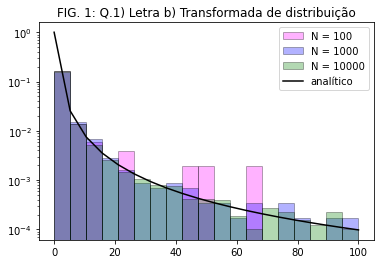

In [ ]:
plt.title('FIG. 1: Q.1) Letra b) Transformada de distribuição')
gerando_histograma(escala_log_x = False, step = False)

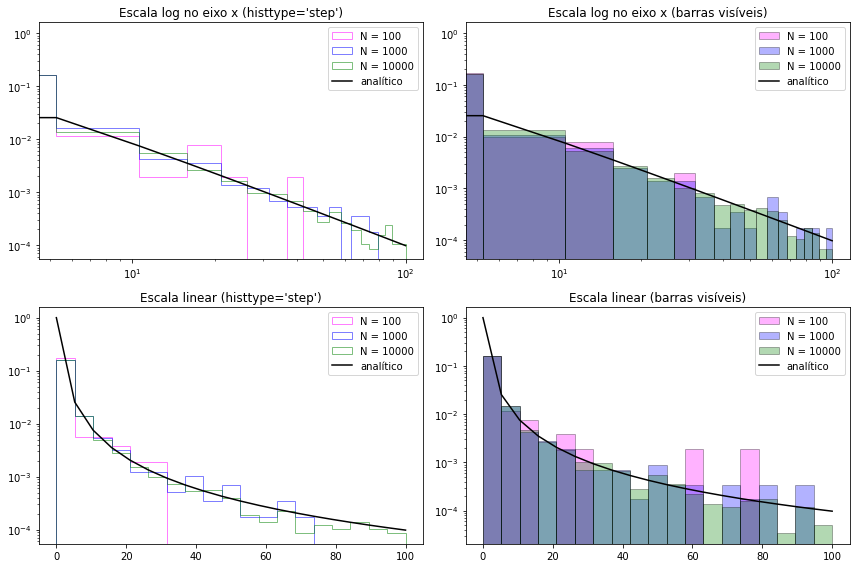

In [ ]:
# Criação dos subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Opção 1: escala log no eixo x, histtype='step'
plt.subplot(2, 2, 1)
gerando_histograma(escala_log_x=True, step=True)
plt.title("Escala log no eixo x (histtype='step')")

# Opção 2: escala log no eixo x, barras visíveis
plt.subplot(2, 2, 2)
gerando_histograma(escala_log_x=True, step=False)
plt.title("Escala log no eixo x (barras visíveis)")

# Opção 3: escala linear, histtype='step'
plt.subplot(2, 2, 3)
gerando_histograma(escala_log_x=False, step=True)
plt.title("Escala linear (histtype='step')")

# Opção 4: escala linear, barras visíveis
plt.subplot(2, 2, 4)
gerando_histograma(escala_log_x=False, step=False)
plt.title("Escala linear (barras visíveis)")

plt.tight_layout()
plt.show()

---
---
### Resolução Questão 2 -- Prova 2 , da disciplina de Metódos Computacionais B, UFRGS ( 2023/1 ).

<img src="https://github.com/LeonardoCamargoRossato/MetCompB/blob/main/Resolucao_Prova2/Questao2_Prova2_MetCompB.png?raw=1" alt="Questao2_Prova2_MetCompB" width="500">

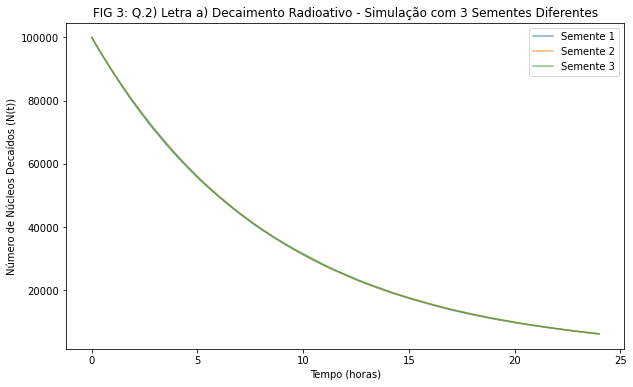

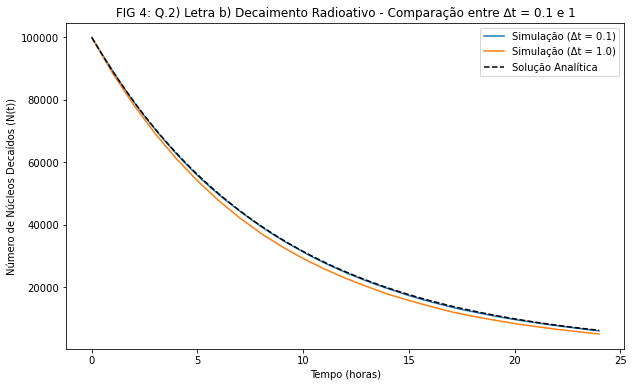

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para simular o decaimento radioativo
def simulacao_decaimento_radioativo(N0, lambda_, dt):
    N = N0
    passos_tempo = np.arange(0, 24+dt, dt)
    contagens_decaimento = []
    for t in passos_tempo:
        contagens_decaimento.append(N)
        prob_decaimento = lambda_ * dt
        particulas_decaidas = np.sum(np.random.uniform(0, 1, N) < prob_decaimento)
        N -= particulas_decaidas
    return passos_tempo, contagens_decaimento

''' ________________________________________________ Usuário '''

# Parâmetros iniciais
N0        = 10**5                   # Número inicial de núcleos
meia_vida = 6                       # Meia-vida do Tecnécio em horas
lambda_   = np.log(2) / meia_vida   # Taxa de decaimento
valores_dt = [0.1, 1.0]             # Valores de intervalo de tempo para comparação
sementes = [42, 123, 987]           # Sementes diferentes para a simulação

# Q.2) Letra a
plt.figure(figsize=(10, 6))
for _ in range(3):
    T, contagens_decaimento = simulacao_decaimento_radioativo(N0, lambda_, 0.1)
    plt.plot(T, contagens_decaimento, alpha=0.6)

plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos Decaídos (N(t))')
plt.title('FIG 3: Q.2) Letra a) Decaimento Radioativo - Simulação com 3 Sementes Diferentes')
plt.legend(['Semente 1', 'Semente 2', 'Semente 3']); plt.show()

# Q.2) Letra b
plt.figure(figsize=(10, 6))
for dt in valores_dt:
    T, contagens_decaimento = simulacao_decaimento_radioativo(N0, lambda_, dt)
    plt.plot(T, contagens_decaimento, label=f'Simulação (Δt = {dt})')

# Solução analítica
t_analitico = np.linspace(0, 24, 100)
N_analitico = N0*np.exp(-lambda_*t_analitico)
plt.plot(t_analitico, N_analitico, 'k--', label='Solução Analítica')

plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos Decaídos (N(t))')
plt.title('FIG 4: Q.2) Letra b) Decaimento Radioativo - Comparação entre ∆t = 0.1 e 1')
plt.legend(); plt.show()


### Resolução Questão 2, usando Distribuição de Poisson (ao invés de Binomial)

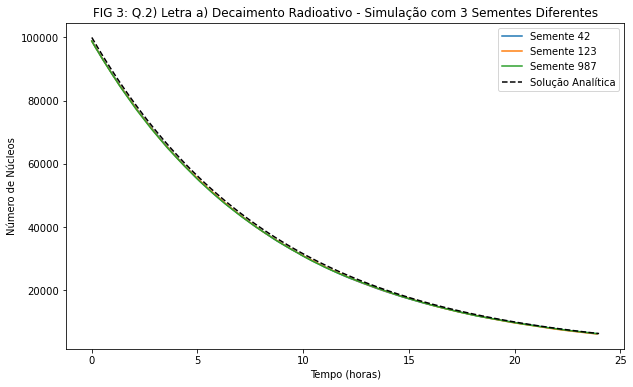

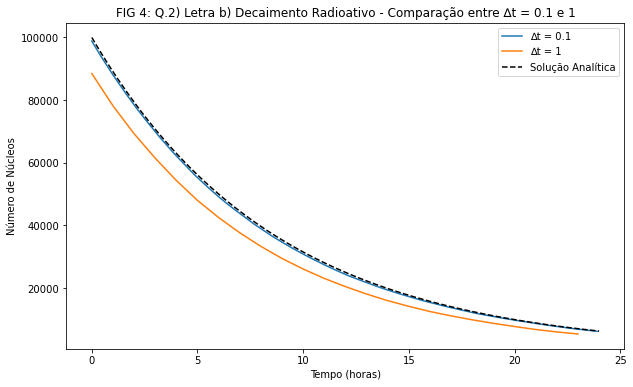

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
N0 = 10**5; meia_vida = 6; lambda_ = np.log(2) / meia_vida; dt = 0.1; tf = 24; sementes = [42, 123, 987]

# Função para simular o decaimento usando distribuição de Poisson
def simulacao_decaimento_radioativo_poisson(N0, lambda_, dt, tf, seed):
    Nt = N0; X = []; Y = []
    np.random.seed(seed)
    for it in range(int(tf / dt)):
        decaimento = np.random.poisson(lambda_ * dt * Nt)
        Nt -= decaimento
        X.append(it * dt)
        Y.append(Nt)
    return X, Y

'''___________________ Q.2 Letra a) ___________________'''

plt.figure(figsize=(10, 6))

# Simulação e plot para três sementes diferentes
for seed in sementes:
    X, Y = simulacao_decaimento_radioativo_poisson(N0, lambda_, dt, tf, seed)
    plt.plot(X, Y, label=f'Semente {seed}')

# Solução analítica
t_analitico = np.linspace(0, 24, 100)
N_analitico = N0 * np.exp(-lambda_ * t_analitico)
plt.plot(t_analitico, N_analitico, 'k--', label='Solução Analítica')

plt.xlabel('Tempo (horas)')
plt.ylabel('Número de Núcleos')
plt.title('FIG 3: Q.2) Letra a) Decaimento Radioativo - Simulação com 3 Sementes Diferentes')
plt.legend()
plt.show()

'''___________________ Q.2 Letra b) ___________________'''

plt.figure(figsize=(10, 6))

# Simulação e plot para ∆t = 0.1
X_1, Y_1 = simulacao_decaimento_radioativo_poisson(N0, lambda_, 0.1, tf, sementes[0])
plt.plot(X_1, Y_1, label=f'∆t = 0.1')

# Simulação e plot para ∆t = 1
X_2, Y_2 = simulacao_decaimento_radioativo_poisson(N0, lambda_, 1, tf, sementes[0])
plt.plot(X_2, Y_2, label=f'∆t = 1')

# Solução analítica
plt.plot(t_analitico, N_analitico, 'k--', label='Solução Analítica')

plt.xlabel('Tempo (horas)')
plt.ylabel('Número de Núcleos')
plt.title('FIG 4: Q.2) Letra b) Decaimento Radioativo - Comparação entre ∆t = 0.1 e 1')
plt.legend()
plt.show()

#### Aqui é pra mostrar que o escopo mostrado do cálculo de Poisson nos slides da disciplina equivale ao método alternativo e mais direto usando "np.random.poisson(...)":

--> http://moodle.if.ufrgs.br/pluginfile.php/458/mod_resource/content/2/aula26_random-poisson.pdf

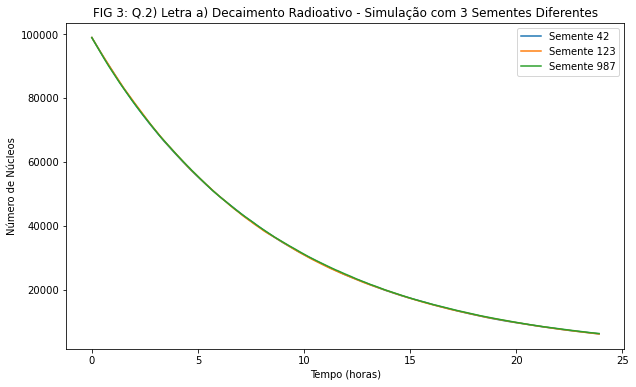

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
N0 = 10**5; half_life = 6; lambda_ = np.log(2) / half_life
dt = 0.1; tf = 24; Nstep = int(tf / dt)
seeds = [42, 123, 987]  # Sementes diferentes para a simulação

# Função para simular o decaimento usando distribuição de Poisson
def radioactive_decay_simulation_poisson(N0, lambda_, dt, Nstep, seed):
    Nt = N0; X = []; Y = []
    np.random.seed(seed)
    for it in range(Nstep):
        decay = 0
        for j in range(1, Nt + 1):
            x = np.random.random()
            if x < lambda_ * dt:
                decay += 1
        Nt -= decay
        X.append(it * dt)
        Y.append(Nt)
    return X, Y

# Criar figura para o gráfico
plt.figure(figsize=(10, 6))

# Simulação e plot para três sementes diferentes
for seed in seeds:
    X, Y = radioactive_decay_simulation_poisson(N0, lambda_, dt, Nstep, seed)
    plt.plot(X, Y, label=f'Semente {seed}')

plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos')
plt.title('FIG 3: Q.2) Letra a) Decaimento Radioativo - Simulação com 3 Sementes Diferentes')
plt.legend(); plt.show()


### Compara resolução da Distribuição Binomial com a  de Poisson

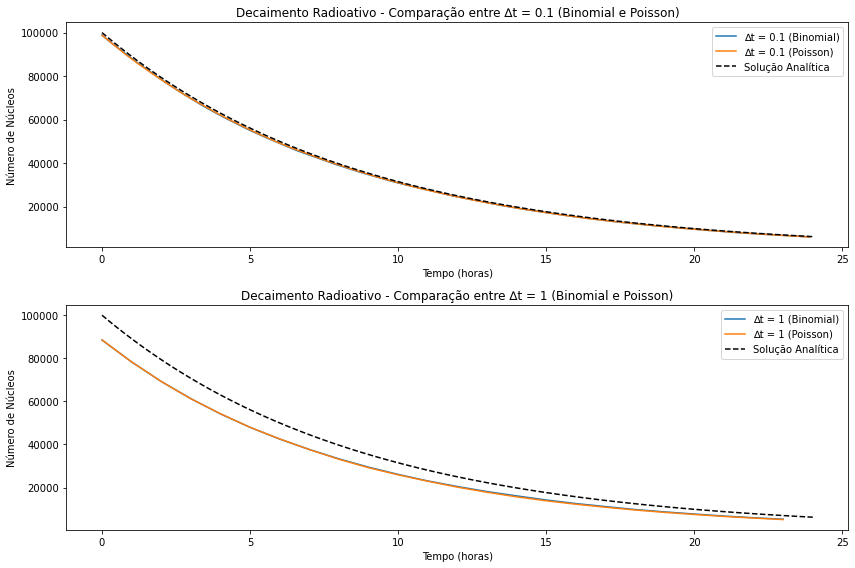

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
N0 = 10**5; half_life = 6; lambda_ = np.log(2) / half_life; dt_1 = 0.1; dt_2 = 1; tf = 24

# Função para simular o decaimento usando distribuição Binomial
def radioactive_decay_simulation_binomial(N0, lambda_, dt, tf, seed):
    np.random.seed(seed)
    Nt = N0; X = []; Y = []
    p = lambda_ * dt
    for it in range(int(tf / dt)):
        decay = np.random.binomial(Nt, p)
        Nt -= decay
        X.append(it * dt); Y.append(Nt)
    return X, Y

# Função para simular o decaimento usando distribuição de Poisson
def radioactive_decay_simulation_poisson(N0, lambda_, dt, tf):
    Nt = N0; X = []; Y = []
    for it in range(int(tf / dt)):
        decay = np.random.poisson(lambda_ * dt * Nt)
        Nt -= decay
        X.append(it * dt); Y.append(Nt)
    return X, Y

# Simulação e plot para ∆t = 0.1 usando distribuição Binomial
X_1, Y_1 = radioactive_decay_simulation_binomial(N0, lambda_, dt_1, tf, seed=0)
# Simulação e plot para ∆t = 0.1 usando distribuição de Poisson
X_1_p, Y_1_p = radioactive_decay_simulation_poisson(N0, lambda_, dt_1, tf)
# Simulação e plot para ∆t = 1 usando distribuição Binomial
X_2, Y_2 = radioactive_decay_simulation_binomial(N0, lambda_, dt_2, tf, seed=1)
# Simulação e plot para ∆t = 1 usando distribuição de Poisson
X_2_p, Y_2_p = radioactive_decay_simulation_poisson(N0, lambda_, dt_2, tf)
# Solução analítica
t_analytical = np.linspace(0, tf, 100); N_analytical = N0*np.exp(-lambda_*t_analytical)

# Plot dos resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(X_1, Y_1, label=f'∆t = {dt_1} (Binomial)')
plt.plot(X_1_p, Y_1_p, label=f'∆t = {dt_1} (Poisson)')
plt.plot(t_analytical, N_analytical, 'k--', label='Solução Analítica')
plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos')
plt.title('Decaimento Radioativo - Comparação entre ∆t = 0.1 (Binomial e Poisson)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(X_2, Y_2, label=f'∆t = {dt_2} (Binomial)')
plt.plot(X_2_p, Y_2_p, label=f'∆t = {dt_2} (Poisson)')
plt.plot(t_analytical, N_analytical, 'k--', label='Solução Analítica')
plt.xlabel('Tempo (horas)'); plt.ylabel('Número de Núcleos')
plt.title('Decaimento Radioativo - Comparação entre ∆t = 1 (Binomial e Poisson)')
plt.legend()

plt.tight_layout(); plt.show()
